## Access Satellite Chlorophyll-a OCI 1Day NOAA20 data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_chlorophylla_oci_1day_noaa20 dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/a9e03db8-f277-45d1-821d-cfcbfe8ae6be).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_chlorophylla_oci_1day_noaa20.ipynb).

In [1]:
dataset_name = "satellite_chlorophylla_oci_1day_noaa20"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.11 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Using Python 3.12.11 environment at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised
Audited 256 packages in 17ms


✅ Local version 0.2.4 is up to date (remote: 0.2.4)


In [3]:
from DataQuery import GetAodn

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2989: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


# Understanding the Dataset

In [4]:
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 483 ms, sys: 53.8 ms, total: 537 ms
Wall time: 2.49 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	time = 797 ;
	latitude = 9601 ;
	longitude = 13601 ;

variables:
	float64 chl_oci(time, latitude, longitude) ;
		chl_oci:flag_applied = HISATZEN HIGLINT LAND CLDICE NAVFAIL ;
		chl_oci:long_name = Chlorophyll Concentration, OCI Algorithm ;
		chl_oci:units = mg/m^3 ;
	<U39 filename(time) ;
	float64 l2_flags(time, latitude, longitude) ;
		l2_flags:flag_applied = HISATZEN HIGLINT LAND CLDICE NAVFAIL ;
		l2_flags:flag_masks = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824, -2147483648] ;
		l2_flags:flag_meanings = ATMFAIL LAND PRODWARN HIGLINT HILT HISATZEN COASTZ SPARE STRAYLIGHT CLDICE COCCOLITH TURBIDW HISOLZEN SPARE LOWLW CHLFAIL NAVWARN ABSAER SPARE MAXAERITER MODGLINT CHLWARN ATMWARN SPARE SEAICE NAVFAIL FILTER SPARE SPARE HIPOL PRODFAIL SPARE ;
		l2_flags:long_name = Level-2 Processin

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2023-02-08 05:30:00'), Timestamp('2025-04-14 05:30:00'))

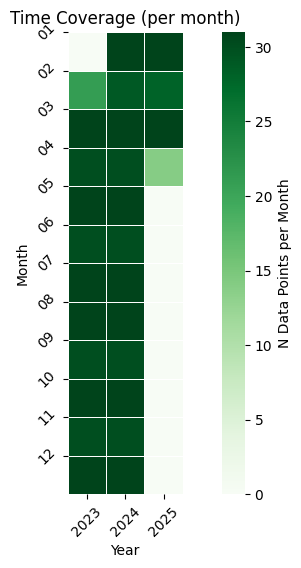

In [7]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

In [8]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='chl_oci', 
                                                  lat=-44, 
                                                  lon=147, 
                                                  date_start='2023-05-22', 
                                                  date_end='2023-12-31', 
                                                  lon_name_override="longitude", 
                                                  lat_name_override="latitude")

CPU times: user 1.45 s, sys: 226 ms, total: 1.67 s
Wall time: 4.33 s


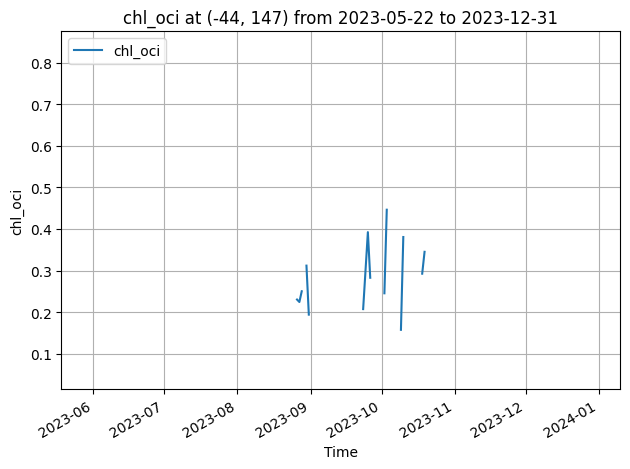

CPU times: user 1.06 s, sys: 232 ms, total: 1.29 s
Wall time: 4.17 s


In [9]:
%%time
time_series_df = aodn_dataset.plot_timeseries(var_name='chl_oci', 
                                                  lat=-44, 
                                                  lon=147, 
                                                  date_start='2023-05-22', 
                                                  date_end='2023-12-31', 
                                                  lon_name_override="longitude", 
                                                  lat_name_override="latitude")

## Plot a gridded variable

2025-08-11 17:13:00,264 - aodn.GetAodn - INFO - Plotting 'Chlorophyll Concentration, OCI Algorithm' for 6 time steps.
2025-08-11 17:13:08,699 - aodn.GetAodn - WARNING - No valid data for 2023-02-08 05:30:00, skipping plot.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2591: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


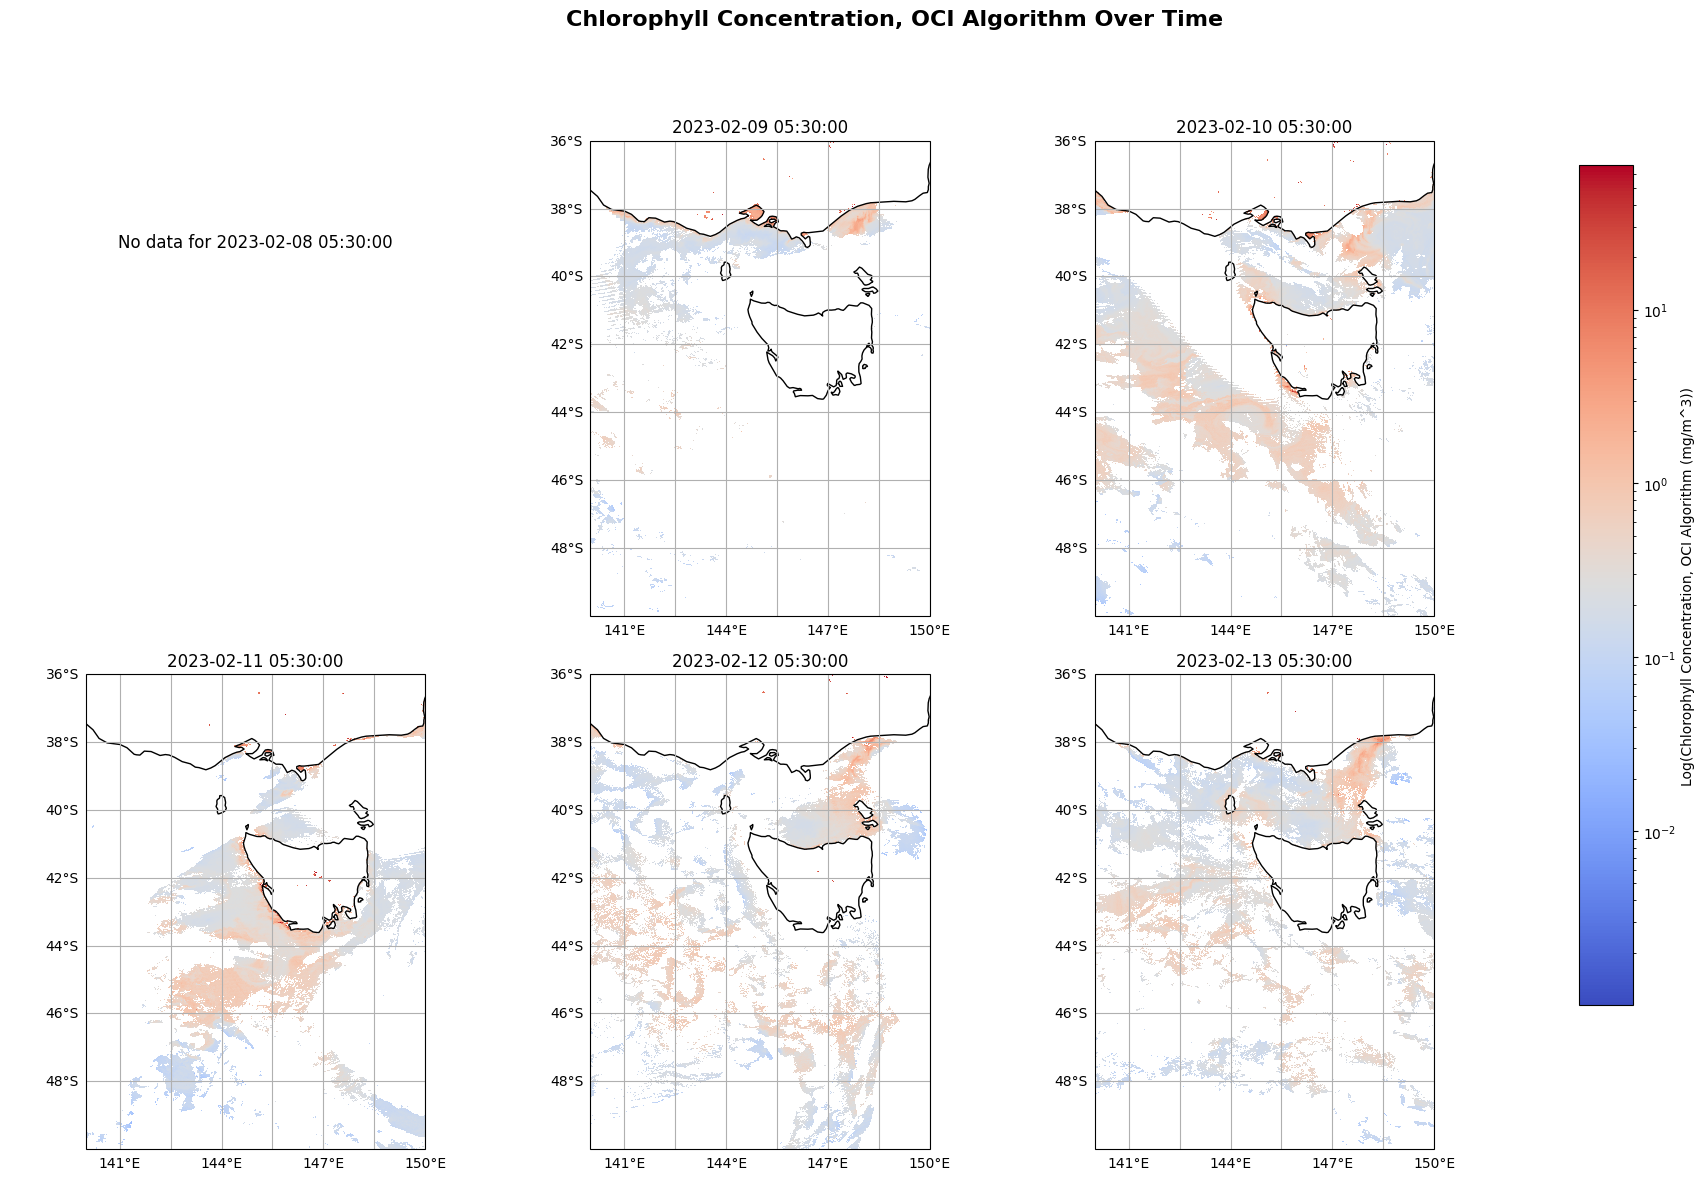

CPU times: user 8.39 s, sys: 4.22 s, total: 12.6 s
Wall time: 15.4 s


In [10]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='chl_oci', 
                                                    date_start='2022-05-22', 
                                                    lon_name_override="longitude", 
                                                    lat_name_override="latitude", 
                                                    lon_slice=(140, 150),
                                                    lat_slice=(-50, -36),
                                                    n_days=6, 
                                                    coastline_resolution="50m", 
                                                    log_scale=True)